In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
seoul_traffic = pd.read_excel('./data/노선별 시간대별 교통량(평일).xlsx')
seoul_traffic.head(8)

,서울도시고속도로 노선별 시간대별 교통량(평일평균),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,(단위 : 대/일)
0,시간대,내부순환로,NaN,강변북로,NaN,북부간선도로,NaN,올림픽대로,NaN,동부간선도로,NaN,분당수서로,NaN,경부고속도로,NaN,서부간선도로,NaN,강남순환로,NaN
1,NaN,동향,서향,동향,서향,동향,서향,동향,서향,북향,남향,북향,남향,북향,남향,북향,남향,동향,서향
2,0,1296,1012,2480,2086,1070,814,1945,2790,1916,1118,988,1097,1822,2239,1356,1486,531,803
3,1,880,695,1633,1374,748,570,1308,1974,1278,745,749,684,1297,1456,869,933,309,480
4,2,634,528,1217,1002,588,440,1018,1537,907,567,576,512,1015,1102,651,668,220,322
5,3,590,536,1182,924,561,499,1124,1362,768,647,540,489,971,1113,667,636,213,268
6,4,923,1027,1985,1250,928,925,1989,1726,896,1356,756,784,1271,1950,1229,1175,414,366
7,5,2348,2793,5145,2867,2258,2300,5212,3331,1683,3877,1901,2590,3080,4598,2485,2328,1882,933


In [11]:
#북부간선도로 동향
book_e = seoul_traffic.iloc[2:,5]

In [12]:
#북부간선북로 서향
book_w = seoul_traffic.iloc[2:,6]
book_w

2      814
3      570
4      440
5      499
6      925
7     2300
8     2935
9     2859
10    2669
11    2683
12    2636
13    2637
14    2677
15    2648
16    2624
17    2619
18    2628
19    2474
20    2298
21    2274
22    2384
23    2387
24    2066
25    1348
Name: Unnamed: 6, dtype: object

In [17]:
#북부간선도로 동향,서향 통행량 차이
book = seoul_traffic.iloc[2:,5:7]
book = book.diff(axis=1)
book = book.abs()
book_diff = book.iloc[:,1]
book_diff.values

array([256, 178, 148, 62, 3, 42, 157, 52, 63, 42, 124, 149, 178, 210, 223,
       208, 230, 419, 636, 641, 439, 350, 338, 365], dtype=object)

In [26]:
book = seoul_traffic.iloc[2:,5:7]
book_mean = book.mean(axis=1)
book_mean.values

array([ 942. ,  659. ,  514. ,  530. ,  926.5, 2279. , 2856.5, 2833. ,
       2700.5, 2704. , 2698. , 2711.5, 2766. , 2753. , 2735.5, 2723. ,
       2743. , 2683.5, 2616. , 2594.5, 2603.5, 2562. , 2235. , 1530.5])

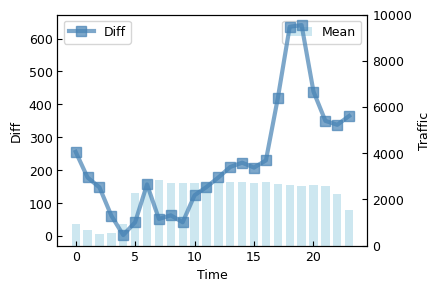

In [28]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 9

# 2. 데이터 준비
x = np.arange(24)
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, book_diff, '-s', color='steelblue', markersize=7, linewidth=3, alpha=0.7, label='Diff')
ax1.set_xlabel('Time')
ax1.set_ylabel('Diff')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, book_mean, color='lightblue', label='Mean', alpha=0.6, width=0.7)
ax2.set_ylabel('Traffic')
ax2.tick_params(axis='y', direction='in')
ax2.set_ylim(0, 10000)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()